# Group Assignment: Data Preparation and Visualization

### Instructions: 
You will be presented with a scenario and will need to utilize your SQL and python skills to complete this assignment successfully. 

Put this .ipynb file in the `jupyter_notebooks` folder in your Docker Compose directory.  Then you will be able to connect to the database and run your code without issue.

Each group will submit two files:
1. a single Jupyter Notebook (.ipynb).  **You must Run All cells before submitting.** This notebook should have all of the relevant visualizations and output displayed properly.  We will restart and run all of the code from this notebook, which should not produce any errors.
2. a PDF version (.pdf) of the Jupyter Notebook. This PDF should have all of the relevant visualizations and output displayed properly. 

In [1]:
#run this code first to connect to the database and verify the connection is working
## DO NOT MODIFY THIS CODE BLOCK
## If you have placed this notebook in the jupyter notebooks folder properly, 
## this block should return the first two rows of the customers table

from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="behappy",
    host="postgres",
    port=5432,
    database="sqlda"))

engine.execute("SELECT * FROM customers LIMIT 2;").fetchall()

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

## Scenario 

You are a team of extremely successful data scientists at a top motor dealership company. You need to create summary tables and visualizations that your boss will present at the next company shareholder meeting.  She has sent you the following e-mail describing what she needs.

***
From: importantboss@topmotordealershipcompany.com

To: datascienceteam@topmotordealershipcompany.com

Subject: Data request for shareholder meeting

We are planning to expand our services in states with the highest sales amounts.  For our next shareholder meeting, we need to provide more information about sales performance at the state level and possible reasons why sales are lower in some states.  Please send me information to address the following items for our next shareholder meeting along with your thoughts.

1. Sales performance at the state level (top 5 and bottom 5 states)
2. For the best performing states, which dealerships are performing well and how are they trending?
3. Is sales performance by state associated with the types of products sold (scooter vs. automobile)?

Thank you!

-Important Boss

***

Your team promptly comes up with the following plan.

## Part 1: Visualizing the top and bottom performing states

1. Write a SELECT query that returns the total sales amount for each state from January 1, 2017 to now.  The table should have two columns, `state` and `total_sales_amount`, with one row for each state ordered by `total_sales_amount` in *descending* order. Make sure that `total_sales_amount` is rounded appropriately.


2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_by_state`.


3. Display the rows in `sales_by_state` corresponding to the 5 states with the **largest** total sales amount in *descending* order.


4. Display the rows in `sales_by_state` corresponding to the 5 states with the **smallest** total sales amount in *ascending* order.


5. Visualize sales performance by state for the top and bottom performing states discovered in 1.3 and 1.4.  You can use more than one visualization.  These should be **presentation ready** (e.g. appropriate and complete titles and axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, etc.). 

Include the code needed for each component of part 1 in the appropriate code block below.

In [2]:
#1.1 select query
query_1 = """select state, sum(sales_amount) as total_sales_amount
            from sales as s 
            inner join customers as c
            on s.customer_id = c.customer_id
            where EXTRACT(year FROM sales_transaction_date) > 2016
            group by state
            order by total_sales_amount desc""" 

In [3]:
#1.2 create dataframe
sales_by_state = pd.read_sql_query(query_1, engine)
sales_by_state = sales_by_state.round(1)
sales_by_state

,state,total_sales_amount
0,None,15978788.9
1,CA,15857816.0
2,TX,15425788.0
3,FL,10410607.3
4,NY,9523439.4
5,PA,5031834.8
6,DC,4747799.9
7,VA,4407464.0
8,OH,4198514.1
9,GA,4113195.3


In [4]:
#1.3 display top 5 performing states
top = sales_by_state[1:6]
top['category'] = ['Top']*5
top

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,total_sales_amount,category
1,CA,15857816.0,Top
2,TX,15425788.0,Top
3,FL,10410607.3,Top
4,NY,9523439.4,Top
5,PA,5031834.8,Top


In [5]:
#1.4 display bottom 5 performing states
bottom = sales_by_state.sort_values(by=['total_sales_amount'])[0:5]
bottom['category'] = ['Bottom']*5
bottom

,state,total_sales_amount,category
51,WY,3249.9,Bottom
50,RI,6099.9,Bottom
49,SD,24179.6,Bottom
48,VT,30015.0,Bottom
47,ME,36364.9,Bottom


In [6]:
all_state = top.append(bottom)
all_state

,state,total_sales_amount,category
1,CA,15857816.0,Top
2,TX,15425788.0,Top
3,FL,10410607.3,Top
4,NY,9523439.4,Top
5,PA,5031834.8,Top
51,WY,3249.9,Bottom
50,RI,6099.9,Bottom
49,SD,24179.6,Bottom
48,VT,30015.0,Bottom
47,ME,36364.9,Bottom


<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


<Figure size 640x480 with 0 Axes>

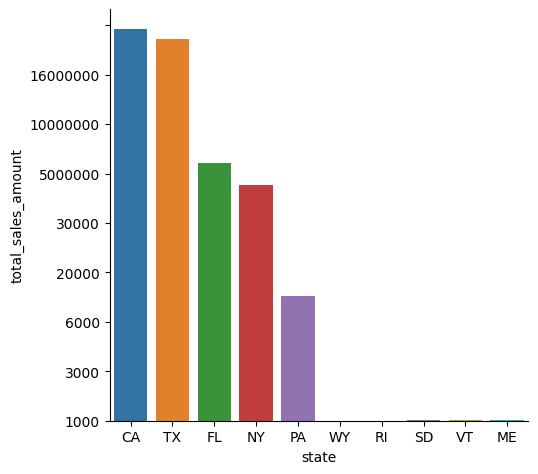

In [8]:
plt.figure()
g = sns.catplot(x ='state', y ='total_sales_amount', data = all_state, kind = 'bar')
g.set(yticklabels=[1000, 3000, 6000, 20000, 30000, 5000000, 10000000, 16000000])

<Figure size 640x480 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Top 5 States')

Text(0.5, 0, 'State')

Text(0, 0.5, 'Total Sales Amount (10 Million)')

<BarContainer object of 5 artists>

<AxesSubplot:>

Text(0.5, 1.0, 'Bottom 5 States')

Text(0.5, 0, 'State')

Text(0, 0.5, 'Total Sales Amount')

<BarContainer object of 5 artists>

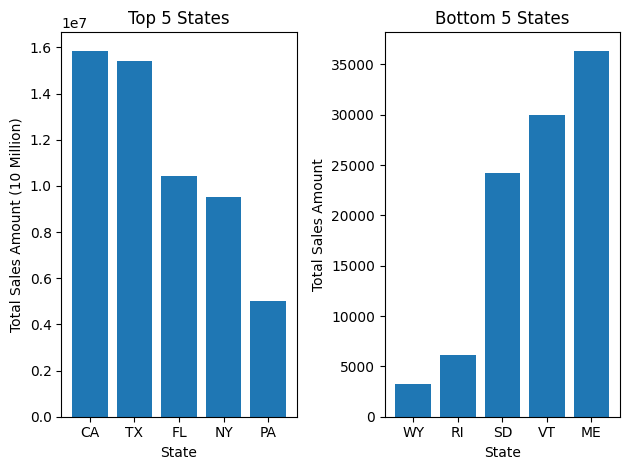

In [13]:
# 1.5 visualize top and bottom performing states
# Visualize sales performance by state for the top and bottom performing states discovered in 1.3 and 1.4. 
# You can use more than one visualization. These should be presentation ready 
# (e.g. appropriate and complete titles and axis labels, remove unnecessary/distracting features, 
# display date range for total sales, no overlapping axis labels, etc.).
# 2017-01-01 ~ 2019-05-31

# x_axis = np.arange(list(top['total_sales_amount'])


x1 = list(top['state'])
y1 = list(top['total_sales_amount'])
x2 = list(bottom['state'])
y2 = list(bottom['total_sales_amount'])

plt.figure()
plt.subplot(1, 2, 1)
plt.title('Top 5 States')
plt.xlabel('State')
plt.ylabel('Total Sales Amount (10 Million)')
plt.bar(list(top['state']), list(top['total_sales_amount']))
#plt.set(yticklabels=[3000, 6000, 20000, 30000, 5000000, 10000000, 16000000])


plt.subplot(1, 2, 2)
plt.title('Bottom 5 States')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.bar(list(bottom['state']), list(bottom['total_sales_amount']))


plt.tight_layout()
plt.show()

## Part 2: Top performing dealerships

Create a table and visualization of historical cumulative sales amounts by dealership from January 1, 2017 to now.  Only include dealerships located in the *top two* states determined in Part 1.  To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `dealership_id`,`sales_transaction_date`, and `cumulative_sales`.  `cumulative_sales` represents the cumulative sales amount from January 1, 2017 to the `sales_transaction_date` for dealership identified by `dealership_id`.  There should be a row for each distinct combination of `dealership_id` and `sales_transaction_date` in the `sales` table (*hint*: window function).
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `cumulative_sales_bydealership`.
    
    
   3. Appropriately visualize historical cumulative sales by dealership across sales transaction dates *in a single plot* (*hint*: seaborn). Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, integer-valued dealership IDs, states indicated clearly, etc.). 

In [3]:
#2.1 select query
query_2 = """
SELECT s.dealership_id, sales_transaction_date, sum(sales_amount) OVER (PARTITION BY s.dealership_id ORDER BY s.sales_transaction_date) as cumulative_sales, d.state
FROM sales as s
INNER JOIN dealerships as d
ON s.dealership_id = d.dealership_id
WHERE s.sales_transaction_date > '2016-12-31'
AND d.state = 'CA' OR d.state = 'TX'
AND s.dealership_id IS NOT NULL 
AND s.sales_transaction_date IS NOT NULL;
"""

In [4]:
#2.2 create dataframe
cumulative_sales_by_dealership = pd.read_sql_query(query_2, engine)
cumulative_sales_by_dealership

,dealership_id,sales_transaction_date,cumulative_sales,state
0,2.0,2017-01-02 17:02:32,399.992,CA
1,2.0,2017-01-06 01:37:05,799.984,CA
2,2.0,2017-01-10 14:32:16,1199.976,CA
3,2.0,2017-01-10 15:55:24,1799.966,CA
4,2.0,2017-01-18 04:57:53,2399.956,CA
...,...,...,...,...
3773,19.0,2019-05-25 08:43:16,7408163.014,TX
3774,19.0,2019-05-25 18:51:16,7408513.004,TX
3775,19.0,2019-05-28 10:11:00,7409212.994,TX
3776,19.0,2019-05-30 23:25:58,7409562.984,TX


<AxesSubplot:xlabel='sales_transaction_date', ylabel='cumulative_sales'>

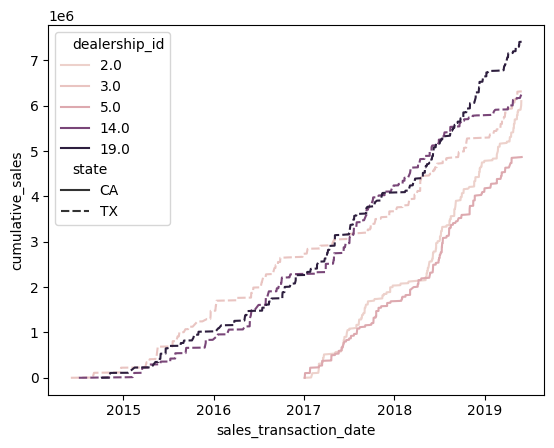

In [5]:
#2.3 visualization
sns.lineplot(data=cumulative_sales_by_dealership, x="sales_transaction_date", y = "cumulative_sales", hue="dealership_id", style="state")

## Part 3: Product mix and sales

Create tables and visualizations to compare the proportion of scooter sales with total sales amount by state for sales from January 2017 to now. To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `state`,`prop_scooters`, and `total_sales`.  `prop_scooters` represents the proportion of scooter sales out of all sales made from January 2017 to now, `total_sales` represents the total sales amount from January 1, 2017 to now.  There should be one row for each state *and no more*.
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `prop_scoot`.
    
    
   3. Appropriately visualize the relationship between proportion of scooter sales and total sales *in a single plot*. Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, etc.). 

In [2]:
#3.1 select query
query_3 = """select tb1.state, (cast(tb1.scooter_count as float)/cast(tb2.total_count as float)) as prop_scooters, tb2.total_sales
from (select state, count(sales_amount) as scooter_count, sum(sales_amount) as scooter_sales
from sales as s join dealerships as d
on s.dealership_id = d.dealership_id
join products as p
on s.product_id = p.product_id
where p.product_type = 'scooter'
and EXTRACT(year FROM sales_transaction_date) > 2016
group by state
order by state) as tb1, 
(select state, count(sales_amount) as total_count, sum(sales_amount) as total_sales from sales as s join dealerships as d
on s.dealership_id = d.dealership_id where EXTRACT(year FROM sales_transaction_date) > 2016
group by state
order by state) as tb2
where tb1.state = tb2.state
"""

In [3]:
#3.2 create data frame
prop_scoot = pd.read_sql_query(query_3, engine)
prop_scoot = prop_scoot.round(2)
prop_scoot

,state,prop_scooters,total_sales
0,AZ,0.90,2869986.36
1,CA,0.90,10969371.89
2,FL,0.91,6312111.54
3,GA,0.89,7132552.21
4,IL,0.89,10420332.79
5,MA,0.88,1827013.01
6,MO,0.90,6677086.18
7,NC,0.90,4714414.09
8,NJ,0.90,7219211.53
9,NV,0.90,1993747.51


[Text(0.5, 0, 'State'), Text(0, 0.5, 'Sales in dollars')]

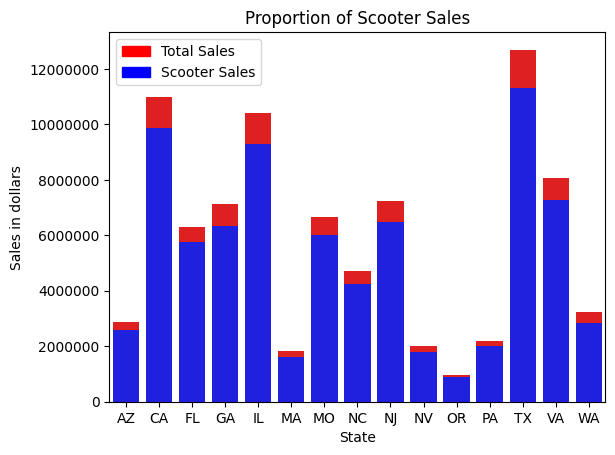

In [4]:
#3.3 visualization
import matplotlib.patches as mpatches
ax = plt.subplots()

ax = sns.barplot(x=prop_scoot["state"], y=prop_scoot["total_sales"], color='r').set(title='Proportion of Scooter Sales')
ax = sns.barplot(x=prop_scoot["state"], y=(prop_scoot["prop_scooters"]*prop_scoot["total_sales"]), color='b')

ax.set(xlabel="State", ylabel="Sales in dollars")
plt.ticklabel_format(style='plain', axis='y')


pop_a = mpatches.Patch(color='r', label='Total Sales')
pop_b = mpatches.Patch(color='b', label='Scooter Sales')
plt.legend(handles=[pop_a,pop_b])

plt.show()


## Part 4: Takeaways from the analysis

Provide your thoughts about the analysis above by answering the following questions in the blank markdown cells provided below. No code should be run for this section.


   1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
          
          
   2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
   
   
   3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that would influence your performance assessment. 
     
     
   4. (Part 3):  How would you describe the relationship between product mix (i.e. proportion of scooters sold) and total sales?  Be specific and cite specific elements of the visualization created in Part 3 to support your claims.

   
   5. (Part 3): What are some potential hypotheses as to why product mix and sales are related in the manner described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

### Part 4 Responses

For each of the following questions, answer in as much preciseness and clarity that you can. Refer back to the tables and plots that you have created to back up your answers if necessary. Answer each question in the cell below. You are NOT to code anything for this section. This is for you to reflect on the analysis developed in response to Parts 1-3.

1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

The residents living in top 5 performing states might have higher incomes than other states. Also, the population of the top 5 states might be growing faster than other states. Thus, incomes, population and populatin growth rate for the top 5 performing states might be examined to test the hypotheses in further analysis. 







 2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

The population of the bottom 5 performing states might be growing slowly comparing to other states. And, there might be less job opportunities in these states. Thus, population, population growth rate, incomes and job openings might be examined to test the hypotheses in further analysis. 

3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that could influence your performance assessment. 


Historical performance of the dealerships visualized in Part 2 is growing from 2017 to 2019. Dealership ID in question are 2.0, 3.0, 5.0, 14.0, and 19.0. Looking at the graph dealership ID 2.0 had the highest growth while 3.0 had the slowest growth. Dealership ID 14.0 had a stagnant growth period between 2018 and 2019. We would need more data regarding the area, demographic etc. for performance assessment. 

 4. (Part 3):  How would you describe the relationship between product mix (i.e. proportion of scooters sold) and total sales?  Be specific and cite specific elements of the visualization created in Part 3 to support your claims.


The visualization shows the total sales as red bars and scooter sales as blue bars. The total height of each bar denotes the total sales made for that state, and the height of the blue bar denotes the scooter sales for the same state. For every bar on the chart, the majority of the red is overlapped by the blue, which implies that scooter sales contribute towards most of the total sales. Therefore, the product mix is leaning heavily towards scooters over other automobiles sold by the company. This implies that scooter sales make up majority of the total sales made by the company. The visualization also makes it clear that this statistic holds true for each state.

 5. (Part 3): What are some potential hypotheses as to why product mix and sales are related in the manner described in 5?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

With the help of the visualization it is evident that the product mix is gravitating more towards scooters over other automobiles. Scooter sales might be high as they have relatively lower maintenance costs. Moreover, scooters cost lesser than most other automobile options. To test these hypotheses for future analysis, data related to incomes in every state, selling prices of automobiles and maintenance costs for each automobile can be utilised.